                         "Predicting the age of abalone from physical measurements"
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

---Columns Name---

Sex: M, F, and I (infant)

LengthLongest shell measurement

Diameterperpendicular to length

Heightwith meat in shell

Whole weightwhole abalone

Shucked weightweight of meat

Viscera weightgut weight (after bleeding)

Theoretically:
The age of an abalone can be determined by counting the number of layers in its shell. However, age determination is a cumbersome process: It involves cutting a sample of the shell, staining it, and counting the number of rings through a microscope.

In [1]:
# Import all the necessary librareis to handle and understand/visualize data. 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
# Read  abalone dataset
df = pd.read_csv("abalone.csv")

In [3]:
# Lets check top five rows of the abalone dataset.
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


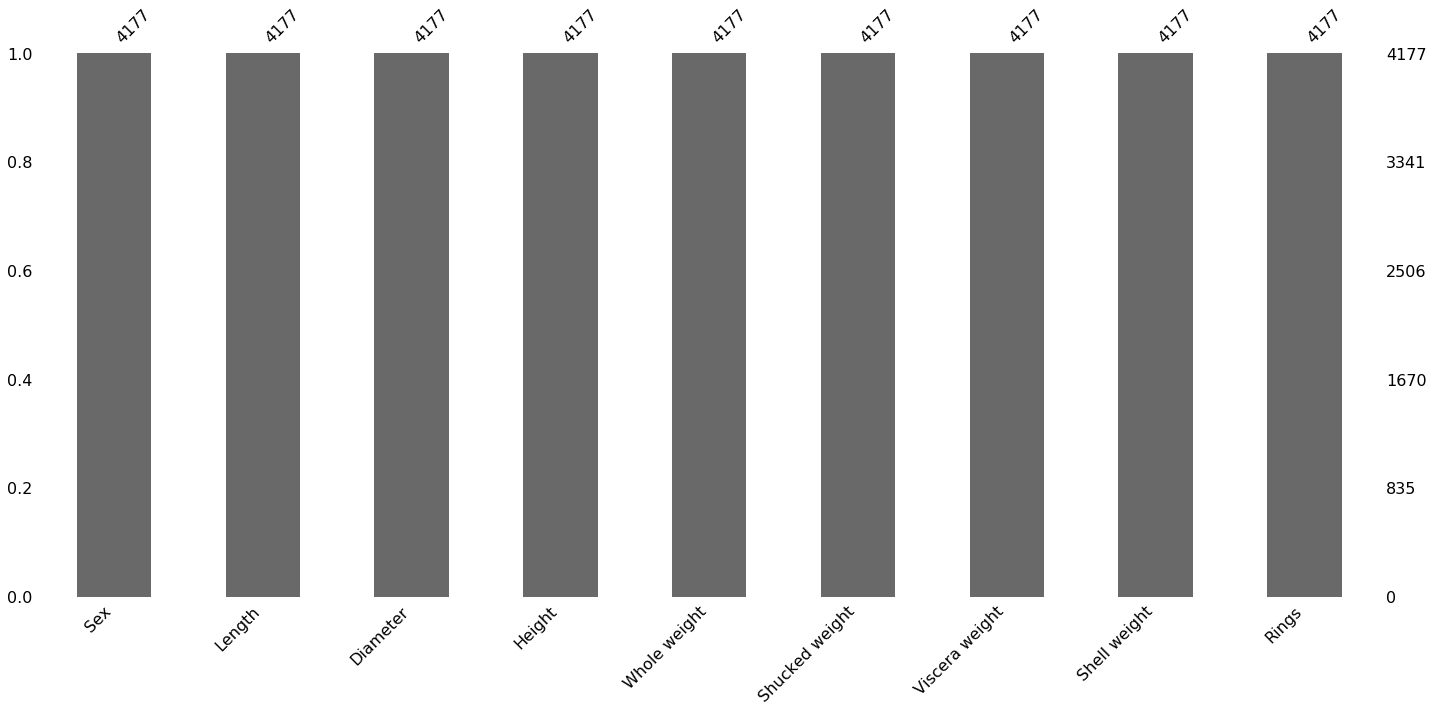

In [4]:
#Missingno is a pretty good library to quickly display missing values in a dataset.
import missingno as msno
msno.bar(df) # For finding missing values. Below figure shows no missing values. 

"pandas_profiling" is another library for missing data understanding. This also provides very high level information about dataset with detail indformation of each column. This helps us not just building understanding over missing values but also provides Correlation in feature space and detail information about variables in data space. 

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(df) 


This data set consists no missing values so we do not need to worry about missing values. With the help of pandas profiling we understood the correlation wihtin the feature set. 

The age of an abalone equals Rings + 1.5 . Since this relationship holds reliably, Rings will be considered as the dependent variable. The number of rings measured in the data ranges from 1 to 29 and most of the abalone have between 5 and 15 rings.

In [6]:
# Add new age column in the dataset
df['age'] = df['Rings']+1.5

In [7]:
# Lets check the new column added in the dataset. 
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDA796D6C8>,
      dtype=object)

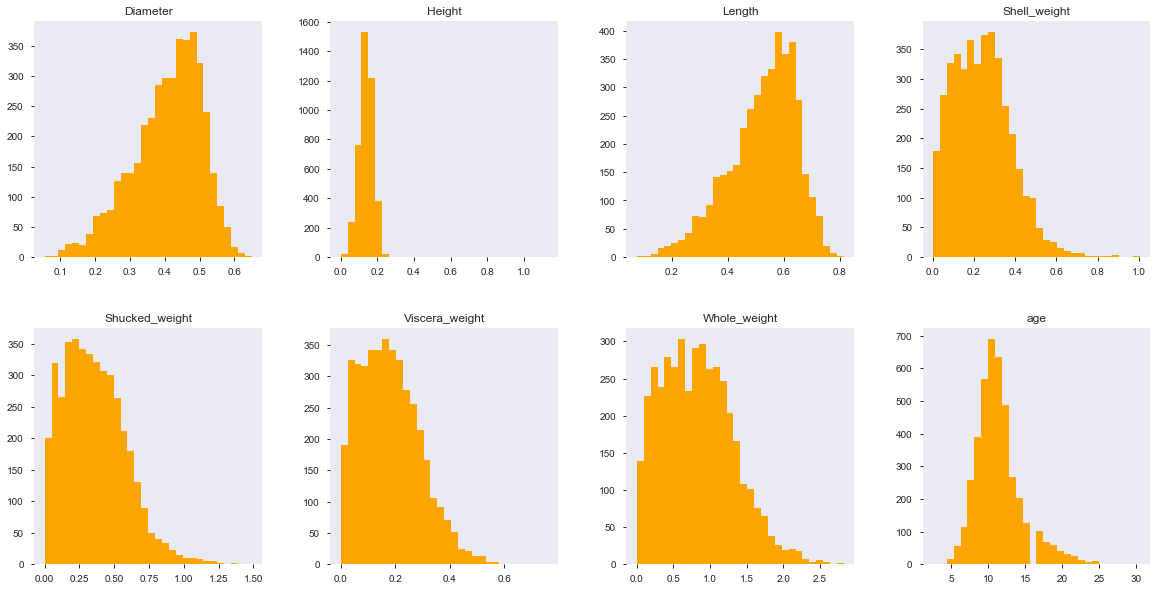

In [8]:
# Analysis the histograme for skewness. 
df.drop('Rings', axis = 1, inplace = True)
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30, color='orange')

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


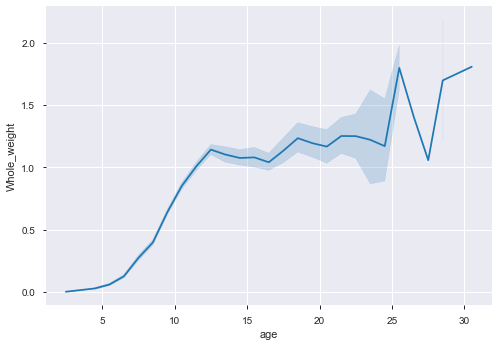

In [10]:
# Draw line plot between age and Whole_weight. 
sns.lineplot(x = "age", y = "Whole_weight", data=df)
plt.show()

With age whole body weight is increasing. 

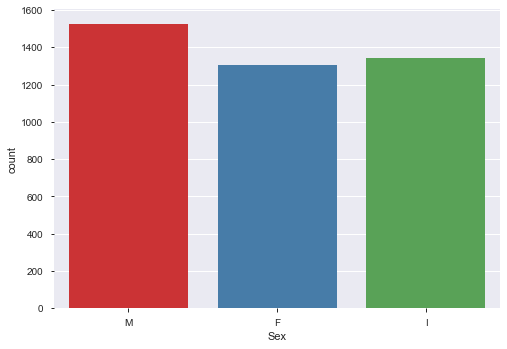

In [11]:
 sns.countplot(x = 'Sex', data = df, palette="Set1")

More males count in the dataset as compared to females and Infants. Females and Infant almost equal distribution in the dataset.

                  Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked_weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355        0.882617   
age             0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera_weight  Shell_weight       age  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole_weight          0.966375      0.955355  0.540390  
Shucked_weig

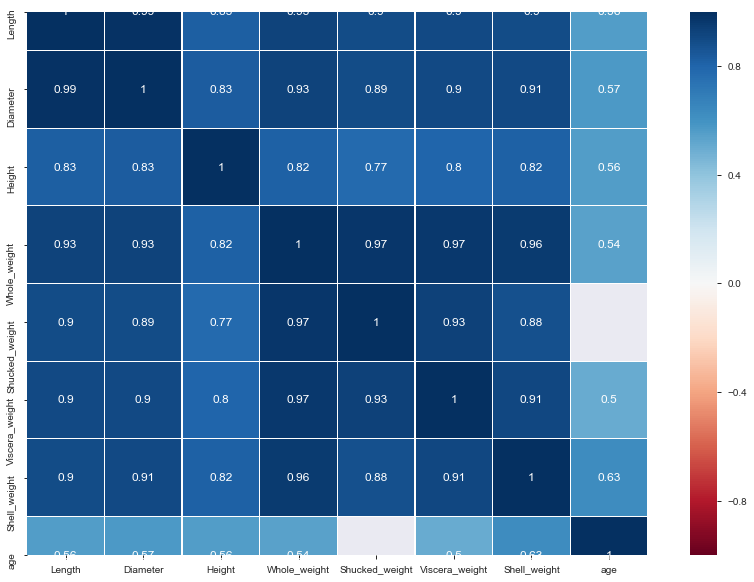

In [12]:
# Analysis the correlation in the dataset
corr = df.corr()
print(corr)

plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.2)], 
            cmap='RdBu', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)

Abalone Data-set features are highly overlapped

In [16]:
# Lets convert catagorical column of the dataset
df = pd.get_dummies(df)
dummy_data = df.copy()

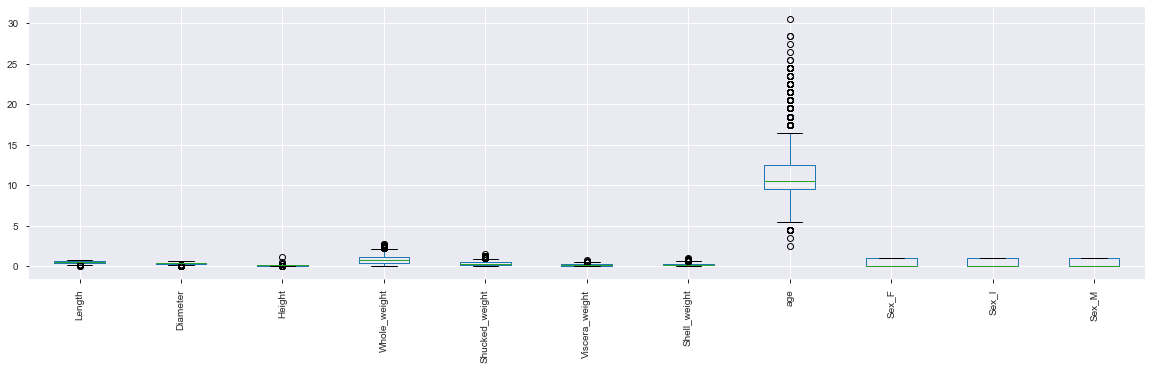

In [17]:
# Lets check the outliers in the dataset
df1=df
df1.boxplot( rot = 90, figsize=(20,5))

Remove outliers in the dataset using IQR

In [18]:
# Copy the dataframe
df2 = df1.copy()

# Remove numerical outliers in the columns by quantile
for col in df2:
    if df2[col].dtype == 'int64' or df2[col].dtype == 'float64':
        
      # Set quantile limits and replacement mean
      upper_limit = df2[col].quantile(.90)
      lower_limit = df2[col].quantile(.10)
      mean = df2[col].mean()
    
      # replace outliers
      for index,value in enumerate(df2[col]):
        if value > upper_limit: df2.loc[index,col] = mean
        if value < lower_limit: df2.loc[index,col] = mean

# View the dataframe
df2

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age,Sex_F,Sex_I,Sex_M
0,0.455000,0.365000,0.095000,0.514000,0.224500,0.101000,0.150000,11.433684,0,0,1
1,0.523992,0.265000,0.090000,0.225500,0.099500,0.048500,0.070000,8.500000,0,0,1
2,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,10.500000,1,0,0
3,0.440000,0.365000,0.125000,0.516000,0.215500,0.114000,0.155000,11.500000,0,0,1
4,0.523992,0.407881,0.139516,0.205000,0.089500,0.180594,0.238831,8.500000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000,12.500000,1,0,0
4173,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500,11.500000,0,0,1
4174,0.600000,0.475000,0.139516,1.176000,0.525500,0.287500,0.308000,10.500000,0,0,1
4175,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000,11.500000,1,0,0


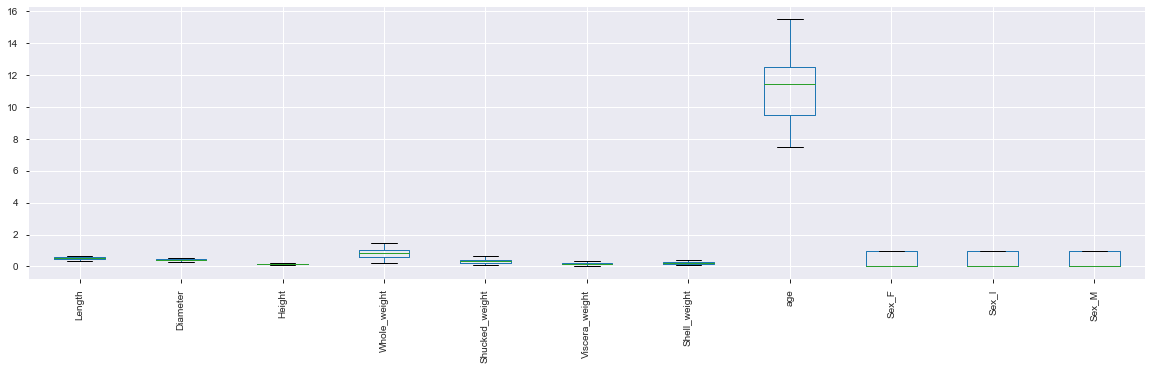

In [19]:
# Plot boxplot to see are outliers removed or not 
df2.boxplot( rot = 90, figsize=(20,5))

In [20]:
# Numerical representation of the skweness in the feature set
print(df2.skew())

Length           -0.353135
Diameter         -0.388356
Height           -0.195763
Whole_weight      0.027176
Shucked_weight    0.102408
Viscera_weight    0.090468
Shell_weight      0.018774
age               0.182742
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64


After oulier removal it has clearly indicated from above analysis there is no skewness in the numerical columns. 

Text(0, 0.5, 'Age')

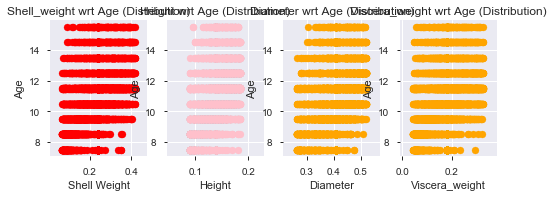

In [24]:
# Lets plot few scatter plot to see distribution of the dataset after outlie removal. 
fig = plt.figure()

fig.add_subplot(2,4,1) 

plt.scatter(x = df2['Shell_weight'], y = df2['age'], color='red')
plt.grid(True)
plt.title('Shell_weight wrt Age (Distribution)')
plt.xlabel("Shell Weight")
plt.ylabel("Age")

fig.add_subplot(2,4,2)

plt.scatter(x = df2['Height'], y = df2['age'], color='pink')
plt.grid(True)
plt.title('Height wrt Age (Distribution)')
plt.xlabel("Height")
plt.ylabel("Age")

fig.add_subplot(2,4,3)

plt.scatter(x = df2['Diameter'], y = df2['age'], color='orange')
plt.grid(True)
plt.title('Diameter wrt Age (Distribution)')
plt.xlabel("Diameter")
plt.ylabel("Age")

fig.add_subplot(2,4,4)

plt.scatter(x = df2['Viscera_weight'], y = df2['age'], color='orange')
plt.grid(True)
plt.title('Viscera_weight wrt Age (Distribution)')
plt.xlabel("Viscera_weight")
plt.ylabel("Age")

Lets perform ML Modeling and Evaluation

In [26]:
# Split features and target class from the dataset for the training purposes 
features = df2.drop('age', axis = 1)
target = df2['age']

In [45]:
from sklearn.preprocessing import  StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

SelectKBest:
Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

In [29]:
standardScale = StandardScaler()
standardScale.fit_transform(features)

selectkBest = SelectKBest()
features_new = selectkBest.fit_transform(features, target)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(features_new, target, test_size = 0.23, random_state=42)

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

# Linear Regression Prediction

In [131]:
# Lets train the model
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
#To retrieve the intercept:
print("Linear Regression Intercept: ", reg.intercept_)
#For retrieving the slope:
print("Linear Regression coefficient: ", reg.coef_)

Linear Regression Intercept:  63051821730441.55
Linear Regression coefficient:  [ 7.82515275e-01  2.40110119e+00  1.39140062e+01 -2.22264574e-01
 -2.78292474e+00  7.78574631e-01  6.18857756e+00 -6.30518217e+13
 -6.30518217e+13 -6.30518217e+13]


In [133]:
y_pred = reg.predict(x_test)
r2_scr_reg=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_reg)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.27360194065077725
Mean Absolute Error: 1.2615405606011763
Mean Squared Error: 2.534173149848894
Root Mean Squared Error: 1.59190864996987


# Ridge Prediction 

In [135]:
# Lets train the model
r = Ridge()
r.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [136]:
y_pred = r.predict(x_test)
r2_scr_r=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_r)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.27505830259437325
Mean Absolute Error: 1.258639296349345
Mean Squared Error: 2.529092363513604
Root Mean Squared Error: 1.5903120333801175


# k-nearest neighbors algorithm Prediction

In [137]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [138]:
y_pred = knn.predict(x_test)
r2_scr_knn=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_knn)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.29581445781434346
Mean Absolute Error: 1.2320753584180948
Mean Squared Error: 2.4566807008232217
Root Mean Squared Error: 1.5673802030213415


# Gradient Boosting Prediction

In [139]:
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [140]:
y_pred = gb.predict(x_test)
r2_scr_gb=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_gb)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.32856185398278415
Mean Absolute Error: 1.2125647436532503
Mean Squared Error: 2.3424353899644963
Root Mean Squared Error: 1.5305016791772874


# Support Vector based Prediction 

In [141]:
svm=SVR()
svm.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [142]:
y_pred = svm.predict(x_test)
r2_scr_svr=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_svr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.2753928716274632
Mean Absolute Error: 1.1802547926480056
Mean Squared Error: 2.527925157944268
Root Mean Squared Error: 1.5899450172708074


# Elastic Net Prediction

In [143]:
en=ElasticNet()
en.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
y_pred = en.predict(x_test)
r2_scr_en=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr_en)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Negative R2 because the model can be arbitrarily worse
#Negative R-squared is often encountered when you test a model 
# that has high bias and/or high variance using out of sample data. 

r2 score:  -6.970619179647031e-06
Mean Absolute Error: 1.4676601353042238
Mean Squared Error: 3.488708129087279
Root Mean Squared Error: 1.8678083759013608


We didn't find major difference in scores of any of the baseline models opted for training and prediction. Here we will consider Ridre Regress to carry out training by tunning hyperparameter of the Regressor using grid search mehtod.

# Hyperparameter tunning of Ridge using GrideSearchCV

In [145]:
from sklearn.model_selection import  GridSearchCV
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm_r = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 10,  n_jobs = -1)
glrm_r.fit(x_train, y_train)
glrm_r.best_params_, glrm_r.best_score_

({'alpha': 0.1, 'solver': 'svd'}, 0.2744698372304042)

In [146]:
# Lets model Ridge using above parameter find by Gridsearch
# Lets train the model
rgrid = Ridge(alpha=1.0,solver='sag',max_iter=20)
rgrid.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=20, normalize=False,
      random_state=None, solver='sag', tol=0.001)

In [147]:
y_pred_r = rgrid.predict(x_test)
r2_scr_rgrid=r2_score(y_test,y_pred_r)
print("r2 score: ",r2_scr_rgrid)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_r))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_r))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

r2 score:  0.275058212821105
Mean Absolute Error: 1.2586326651830482
Mean Squared Error: 2.5290926767041517
Root Mean Squared Error: 1.590312131848384


In [166]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
scores=[r2_scr_reg,r2_scr_r,r2_scr_knn,r2_scr_gb,r2_scr_svr,r2_scr_rgrid]
ML_models=["Linear Regression","Ridge","SVM","K-NN","Gradient Boosting","GridSearchRidge"]

#create traces

trace1 = go.Scatter(
    x = ML_models,
    y= scores,
    name='Regressor Model Names',
    marker =dict(color='rgba(0,255,255,0.7)',
               line =dict(color='rgb(0,0,255)',width=3)),
                text=ML_models
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Models',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

We can further try reducing error using PCA. 

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features_new)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [116]:
pca_df = pd.concat([principalDf, df[['age']]], axis = 1)

In [117]:
features_pca = pca_df.drop('age', axis = 1)
target_pca = pca_df['age']

In [118]:
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(features_pca, target_pca, test_size = 0.23, random_state=42)

In [119]:
r_g1 = Ridge(alpha=1.0,solver='sag',max_iter=20)
r_g1.fit(xpca_train, ypca_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=20, normalize=False,
      random_state=None, solver='sag', tol=0.001)

In [120]:
ypca_pred = r_g1.predict(xpca_test)
r2_scr=r2_score(ypca_test,ypca_pred)
print("r2 score: ",r2_scr)
print('Mean Absolute Error:', metrics.mean_absolute_error(ypca_test, ypca_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ypca_test, ypca_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ypca_test, ypca_pred)))

r2 score:  0.2454569962501414
Mean Absolute Error: 2.0820934533757485
Mean Squared Error: 7.97590766269794
Root Mean Squared Error: 2.8241649496263386


It clearly indicates that PCA deos not shown any improvment in the results. Out of all Rergessor models considered here Tunned Ridge has outperformed. MSE of PCA + Ridge quite high as compared to the fine tunned Ridge. 

In [167]:
# Create the submission file using tunned ridge regressor using GridSearch (rgrid) and submit!
preds = pd.DataFrame(y_pred_r, columns=['Ridge_predAge'])
preds.to_csv('RidgeAgePrediction_submission.csv')